<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


Import the pandas module.


In [6]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [7]:
#from pyodide.http import pyfetch

#async def download(url, filename):
    #response = await pyfetch(url)
    #if response.status == 200:
        #with open(filename, "wb") as f:
            #f.write(await response.bytes())

In [8]:
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [9]:
#await download(file_path, "m2_survey_data.csv")
#file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [10]:
#df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [11]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


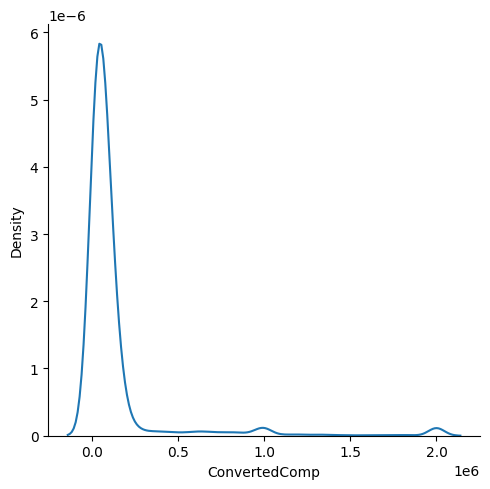

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.displot(df, x='ConvertedComp', kind='kde')

plt.show() 

Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

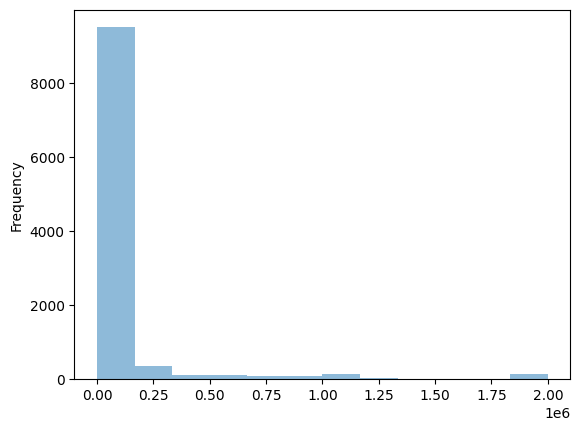

In [16]:
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)

What is the median of the column `ConvertedComp`?


In [17]:
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [20]:
print((df['Gender'].eq('Man').sum()), 'respondents')

10480 respondents


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
df[df['Gender'].eq('Woman')]['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


In [35]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

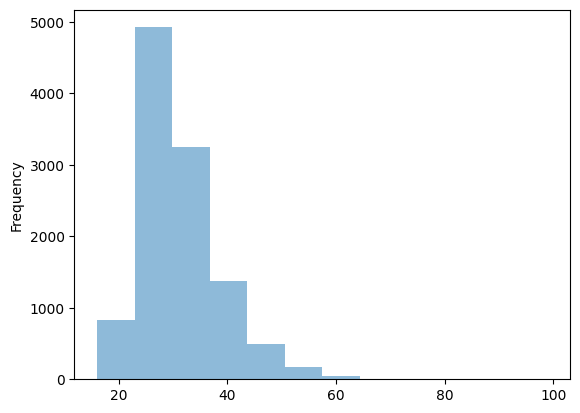

In [23]:
df['Age'].plot.hist(bins=12, alpha=0.5)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: xlabel='ConvertedComp'>

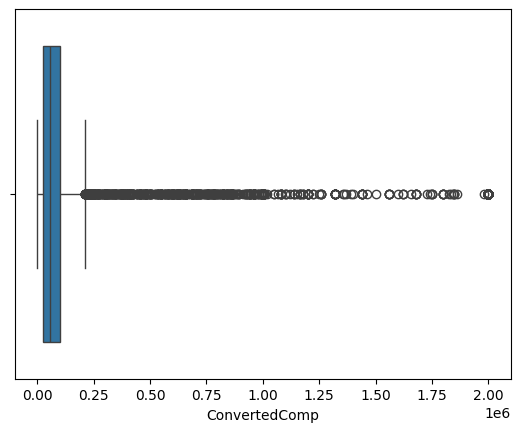

In [24]:
sns.boxplot(x=df["ConvertedComp"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [26]:
df['ConvertedComp'].describe()
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile range is', IQR)

Interquartile range is 73132.0


Find out the upper and lower bounds.


In [27]:
Q4 = df['ConvertedComp'].quantile(1)
print('upper bound is', Q1)
print('lower bound is', Q4)

upper bound is 26868.0
lower bound is 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [28]:
Outliers_below_1stQ = df['ConvertedComp'] < (Q1 - 1.5*IQR).sum()
Outliers_above_3rdQ = df['ConvertedComp'] > (Q3 + 1.5*IQR).sum()

print(Outliers_below_1stQ)
print(Outliers_above_3rdQ)

0        False
1        False
2        False
3        False
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool
0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
df1 = df[~(Outliers_below_1stQ)]
df1.shape


(11398, 85)

In [31]:
df2 = df[~(Outliers_above_3rdQ)]
df2.shape

(10519, 85)

In [36]:
df["ConvertedComp"].median()

57745.0

## Correlation


### Finding correlation


In [33]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Eshwanth
